<a href="https://colab.research.google.com/github/goitoom/Lung-cancer-detection-models/blob/main/MLprojectCW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing pandas library
import pandas as pd

#Loading data into a DataFrame
df=pd.read_csv('/content/lung_cancer.csv')

In [ ]:
df

,PATIENT_ID,GENOMIC SEX,AGE,BLOOD_TYPE,NUMBER_OF_SIBLINGS,YEAR_OF_BIRTH,ADOPTED_STATUS,NUMBER_OF_PREGNANCIES,MONTH_OF_BIRTH,PARENT_ALIVE,...,Constant_Exhaustion,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,A10230,M,69,A,5.0,1945.0,1,NaN,1,3,...,Yes,2.0,1,2.0,2,2,2.0,2,2,YES
1,A10231,M,74,B,1.0,1940.0,1,NaN,10,2,...,Yes,2.0,2,1.0,1,1,2.0,2,2,YES
2,A10232,F,59,AB,0.0,1955.0,1,5.0,10,2,...,Yes,2.0,1,2.0,1,2,2.0,1,2,NO
3,A10233,M,63,O,3.0,1951.0,1,NaN,8,2,...,No,1.0,1,1.0,2,1,1.0,2,2,NO
4,A10234,F,63,A,4.0,1951.0,1,3.0,5,1,...,No,1.0,1,2.0,1,2,2.0,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,A11345,FEMALE,57,A,3.0,1957.0,1,1.0,12,3,...,Yes,2.0,1,2.0,2,2,1.0,1,1,NO
1116,A11346,FEMALE,51,A,2.0,1963.0,1,0.0,11,2,...,No,1.0,1,1.0,1,1,2.0,1,2,NO
1117,A11347,FEMALE,65,A,1.0,1949.0,1,2.0,7,1,...,Yes,2.0,1,2.0,1,2,1.0,1,1,NO
1118,A11348,FEMALE,57,A,2.0,1957.0,1,5.0,1,1,...,Yes,2.0,1,2.0,1,2,1.0,1,1,NO


In [ ]:
df.columns

Index(['PATIENT_ID', 'GENOMIC SEX', 'AGE', 'BLOOD_TYPE', 'NUMBER_OF_SIBLINGS',
       'YEAR_OF_BIRTH', 'ADOPTED_STATUS', 'NUMBER_OF_PREGNANCIES',
       'MONTH_OF_BIRTH', 'PARENT_ALIVE', 'SMOKING_STATUS', 'DAILY_CIGARETTES',
       'YELLOW_SKIN', 'ANXIETY', 'PEER_PRESSURE', 'COPD_DIAGNOSES',
       'Constant_Exhaustion', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL_CONSUMPTION', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
df.shape

(1120, 26)

In [ ]:
df=df.drop(columns=['PATIENT_ID','YEAR_OF_BIRTH', 'BLOOD_TYPE', 'NUMBER_OF_SIBLINGS', 'MONTH_OF_BIRTH', 'ADOPTED_STATUS', 'PARENT_ALIVE', 'PEER_PRESSURE', 'ALLERGY ', 'Constant_Exhaustion'],axis=1)

In [ ]:
df.describe()

,NUMBER_OF_PREGNANCIES,SMOKING_STATUS,YELLOW_SKIN,ANXIETY,COPD_DIAGNOSES,FATIGUE,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,546.00000,1120.000000,1120.000000,1120.000000,1102.000000,1115.000000,1110.000000,1120.000000,1120.000000,1116.000000,1120.000000,1120.000000
mean,2.56044,1.550893,1.559821,1.491964,1.503630,1.634978,1.544144,1.550893,1.567857,1.624552,1.475000,1.551786
std,1.71154,0.497625,0.496630,0.500159,0.500214,0.481652,0.498272,0.497625,0.495595,0.484455,0.499598,0.497533
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.00000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,4.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,5.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.isnull().sum()

GENOMIC SEX               19
AGE                        3
NUMBER_OF_PREGNANCIES    574
SMOKING_STATUS             0
DAILY_CIGARETTES         503
YELLOW_SKIN                0
ANXIETY                    0
COPD_DIAGNOSES            18
FATIGUE                    5
WHEEZING                  10
ALCOHOL_CONSUMPTION        0
COUGHING                   0
SHORTNESS_OF_BREATH        4
SWALLOWING_DIFFICULTY      0
CHEST_PAIN                 0
LUNG_CANCER                3
dtype: int64

The number of missing values is much higher than optimal, so we will drop the number of pregnancies and daily cigarettes.

In [ ]:
df=df.drop(columns=['NUMBER_OF_PREGNANCIES'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENOMIC SEX            1101 non-null   object 
 1   AGE                    1117 non-null   object 
 2   SMOKING_STATUS         1120 non-null   int64  
 3   DAILY_CIGARETTES       617 non-null    object 
 4   YELLOW_SKIN            1120 non-null   int64  
 5   ANXIETY                1120 non-null   int64  
 6   COPD_DIAGNOSES         1102 non-null   float64
 7   FATIGUE                1115 non-null   float64
 8   WHEEZING               1110 non-null   float64
 9   ALCOHOL_CONSUMPTION    1120 non-null   int64  
 10  COUGHING               1120 non-null   int64  
 11  SHORTNESS_OF_BREATH    1116 non-null   float64
 12  SWALLOWING_DIFFICULTY  1120 non-null   int64  
 13  CHEST_PAIN             1120 non-null   int64  
 14  LUNG_CANCER            1117 non-null   object 
dtypes: f

In [ ]:
df.describe()

,SMOKING_STATUS,YELLOW_SKIN,ANXIETY,COPD_DIAGNOSES,FATIGUE,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,1120.000000,1120.000000,1120.000000,1102.000000,1115.000000,1110.000000,1120.000000,1120.000000,1116.000000,1120.000000,1120.000000
mean,1.550893,1.559821,1.491964,1.503630,1.634978,1.544144,1.550893,1.567857,1.624552,1.475000,1.551786
std,0.497625,0.496630,0.500159,0.500214,0.481652,0.498272,0.497625,0.495595,0.484455,0.499598,0.497533
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
# Measurement scales
measurement_scales = {
    'Genomic_Sex': 'Nominal',
    'Age': 'Ratio',
    'Smoking_Status': 'Nominal',
    'Anxiety': 'Nominal',
    'DAILY_CIGARETTE': 'Numeric',
    'COPD_Diagnosis': 'Nominal',
    'Fatigue': 'Nominal',
    'Wheezing': 'Nominal',
    'Yellow_skin': 'Nominal',
    'Alcohol_Consumption': 'Ratio',
    'Coughing': 'Nominal',
    'Shortness_of_Breath': 'Nominal',
    'Swallowing_Difficulty': 'Nominal',
    'Chest_Pain': 'Nominal',
    'Lung_Cancer': 'Nominal'
}
for var, scale in measurement_scales.items():
    print(f'{var}: {scale}')

Genomic_Sex: Nominal
Age: Ratio
Smoking_Status: Nominal
Anxiety: Nominal
DAILY_CIGARETTE: Numeric
COPD_Diagnosis: Nominal
Fatigue: Nominal
Wheezing: Nominal
Yellow_skin: Nominal
Alcohol_Consumption: Ratio
Coughing: Nominal
Shortness_of_Breath: Nominal
Swallowing_Difficulty: Nominal
Chest_Pain: Nominal
Lung_Cancer: Nominal


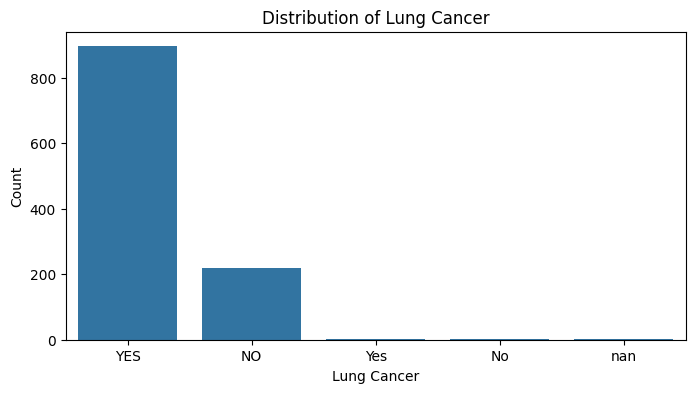

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype(str)

# Plot the distribution of the target variable 'Lung_Cancer'
plt.figure(figsize=(8, 4))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()


In [ ]:
df.shape

(1120, 15)

**DATA PREPARATION**


In [ ]:
df=df.rename(columns={'GENOMIC SEX':'GENDER'})

In [ ]:
df['GENDER'].unique()

array(['M', 'F', nan, 'MALE', 'FEMALE'], dtype=object)

In [ ]:
df['GENDER'].isnull().sum()

19

Normalization and Standardization of the format: Male=1, Female=0. Missing values filled using mode and data type changed to integer.

In [ ]:

import numpy as np

#Normalize Gender Values that are in diffrent format like male Male m...
def normalize_gender(gender):
    if pd.isna(gender):  # Check if the value is NaN
        return None
    if isinstance(gender, str):
        gender = gender.strip().lower()
        if gender in ['male', 'm']:
            return 'Male'
        elif gender in ['female', 'f']:
            return 'Female'
    return None  # if there is any unexpected values and non-string types it turns into none

df['GENDER'] = df['GENDER'].apply(normalize_gender)

# using mode for imputation for the missing value
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

# trasforming Gender to Numerical Values
gender_mapping = {'Male': 1, 'Female': 0}
df['GENDER'] = df['GENDER'].map(gender_mapping)

print(df['GENDER'])


0       1
1       1
2       0
3       1
4       0
       ..
1115    0
1116    0
1117    0
1118    0
1119    0
Name: GENDER, Length: 1120, dtype: int64


Our feature has string, negative value, and unrealistic value for age. There are 3 missing values so we strip it and change the string to an integer value. We replace the unrealistic age and the empty cells with the median.

In [ ]:
df['AGE'].unique()

array(['69', '74', '59', '63', '75', '52', '51', '68', '53', '61', '72',
       '60', '58', '48', '57', '44', '64', '21', '65', '55', '62', '56',
       '67', '77', '70', '54', '49', '73', '47', '71', '66', '76', '78',
       '81', '79', '38', '39', '87', '46', '-56', nan, '170', '35',
       'Twenty One', '43', '28', '20', '22', '32', '27', '40', '37', '25',
       '45', '29', '31', '36', '190', '42', '34', '23', '30', '50', '33',
       '41', '402', '26'], dtype=object)

In [ ]:
#Define a function to convert text to numeric
def text_to_numeric(age):
    text_to_num = {
        'twenty one': 21,
    }
    age = str(age).strip().lower()  # Ensure age is converted to string before processing
    return text_to_num.get(age, age)

df['AGE'] = df['AGE'].apply(text_to_numeric)
#Removes - from the age
df['AGE'] = df['AGE'].str.strip('-')

# Converts all entries to numeric values, setting errors='coerce' to handle non-numeric
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

df.loc[df['AGE'] > 120, 'AGE'] = np.nan
# Fill NaN values with median age
df['AGE'].fillna(df['AGE'].median(), inplace=True)
#changes the data type to integer
df['AGE'] = df['AGE'].astype(int)
print(df['AGE'])


0       69
1       74
2       59
3       63
4       63
        ..
1115    57
1116    51
1117    65
1118    57
1119    20
Name: AGE, Length: 1120, dtype: int64


In [ ]:
df['AGE'].unique()

array([69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64,
       21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81,
       79, 38, 39, 87, 46, 35, 43, 28, 20, 22, 32, 27, 40, 37, 25, 45, 29,
       31, 36, 42, 34, 23, 30, 50, 33, 41, 26])

There is a high number of missing values for daily cigarettes. This can be fixed by creating a logical relation (if its a non smoker 1 then daily cigaratte is 0) between smoking status and daily cigarettes and converting the text to numeric values. Any daily cigarette count exceeding 40  changed to 'nan'.

In [ ]:
df['DAILY_CIGARETTES']

0       NaN
1        29
2       NaN
3        20
4       NaN
       ... 
1115    NaN
1116     21
1117    NaN
1118     21
1119    NaN
Name: DAILY_CIGARETTES, Length: 1120, dtype: object

In [ ]:
df['DAILY_CIGARETTES'].isnull().sum()

503

In [ ]:
df['DAILY_CIGARETTES'].unique()

array([nan, '29', '20', '37', '8', '34', '18', '25', '4', '10', '39',
       '33', '14', '31', '36', '2', '32', '21', '13', '23', '40', '38',
       '3', '12', '35', '6', '26', '15', '19', '1', '11', '30', '9',
       '-21', '5', '22', '7', '24', '27', '28', '16', '1000', '17',
       'five'], dtype=object)

In [ ]:
# Define a function to convert text to numeric
def text_to_numeric(daily_cigarettes):
    text_to_num = {
        'five': 5,
    }
    daily_cigarettes = str(daily_cigarettes).strip().lower()
    return text_to_num.get(daily_cigarettes, daily_cigarettes)

df['DAILY_CIGARETTES'] = df['DAILY_CIGARETTES'].apply(text_to_numeric)
df['DAILY_CIGARETTES'] = pd.to_numeric(df['DAILY_CIGARETTES'], errors='coerce')

#Removes the negative from  daily cigaratte by applying  absolute
df['DAILY_CIGARETTES'] = df['DAILY_CIGARETTES'].abs()

# Converts all entries to numeric values, setting errors='coerce' to handle non-numeric
df['DAILY_CIGARETTES'] = pd.to_numeric(df['DAILY_CIGARETTES'], errors='coerce')

df.loc[df['DAILY_CIGARETTES'] > 40, 'DAILY_CIGARETTES'] = np.nan
# Define the condition to fill missing values in Daily Cigarettes

condition = df['SMOKING_STATUS'] == 1
# Fill missing values in Daily Cigarettes column where Smoking Status is 1(non smokers)
df.loc[condition, 'DAILY_CIGARETTES'] = df.loc[condition, 'DAILY_CIGARETTES'].fillna(0)

df = df.replace([np.inf, -np.inf], np.nan)  # Replace any inf values with NaN
df['DAILY_CIGARETTES'].fillna(0, inplace=True)
#changes the data type to integer
df['DAILY_CIGARETTES'] = df['DAILY_CIGARETTES'].astype(int)
print(df['DAILY_CIGARETTES'])

0        0
1       29
2        0
3       20
4        0
        ..
1115     0
1116    21
1117     0
1118    21
1119     0
Name: DAILY_CIGARETTES, Length: 1120, dtype: int64


In [ ]:
df['DAILY_CIGARETTES'].unique()

array([ 0, 29, 20, 37,  8, 34, 18, 25,  4, 10, 39, 33, 14, 31, 36,  2, 32,
       21, 13, 23, 40, 38,  3, 12, 35,  6, 26, 15, 19,  1, 11, 30,  9,  5,
       22,  7, 24, 27, 28, 16, 17])

In [ ]:
df['COPD_DIAGNOSES'].fillna(df['COPD_DIAGNOSES'].mode()[0], inplace=True)
df['WHEEZING'].fillna(df['WHEEZING'].mode()[0], inplace=True)
df['FATIGUE '].fillna(df['FATIGUE '].mode()[0], inplace=True)
df['SHORTNESS_OF_BREATH'].fillna(df['SHORTNESS_OF_BREATH'].mode()[0], inplace=True)

# Convert columns to integer
df['COPD_DIAGNOSES'] = df['COPD_DIAGNOSES'].astype(int)
df['WHEEZING'] = df['WHEEZING'].astype(int)
df['FATIGUE '] = df['FATIGUE '].astype(int)
df['SHORTNESS_OF_BREATH'] = df['SHORTNESS_OF_BREATH'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 1120 non-null   int64 
 1   AGE                    1120 non-null   int64 
 2   SMOKING_STATUS         1120 non-null   int64 
 3   DAILY_CIGARETTES       1120 non-null   int64 
 4   YELLOW_SKIN            1120 non-null   int64 
 5   ANXIETY                1120 non-null   int64 
 6   COPD_DIAGNOSES         1120 non-null   int64 
 7   FATIGUE                1120 non-null   int64 
 8   WHEEZING               1120 non-null   int64 
 9   ALCOHOL_CONSUMPTION    1120 non-null   int64 
 10  COUGHING               1120 non-null   int64 
 11  SHORTNESS_OF_BREATH    1120 non-null   int64 
 12  SWALLOWING_DIFFICULTY  1120 non-null   int64 
 13  CHEST_PAIN             1120 non-null   int64 
 14  LUNG_CANCER            1120 non-null   object
dtypes: int64(14), object(

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING_STATUS           0
DAILY_CIGARETTES         0
YELLOW_SKIN              0
ANXIETY                  0
COPD_DIAGNOSES           0
FATIGUE                  0
WHEEZING                 0
ALCOHOL_CONSUMPTION      0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df

,GENDER,AGE,SMOKING_STATUS,DAILY_CIGARETTES,YELLOW_SKIN,ANXIETY,COPD_DIAGNOSES,FATIGUE,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,69,1,0,2,2,1,2,2,2,2,2,2,2,YES
1,1,74,2,29,1,1,2,2,1,1,1,2,2,2,YES
2,0,59,1,0,1,1,1,2,2,1,2,2,1,2,NO
3,1,63,2,20,2,2,1,1,1,2,1,1,2,2,NO
4,0,63,1,0,2,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0,57,1,0,1,1,2,2,2,2,2,1,1,1,NO
1116,0,51,2,21,1,2,1,1,1,1,1,2,1,2,NO
1117,0,65,1,0,2,1,1,2,2,1,2,1,1,1,NO
1118,0,57,2,21,1,2,2,2,2,1,2,1,1,1,NO


In [ ]:
df['LUNG_CANCER'].unique()

array(['YES', 'NO', 'Yes', 'No', 'nan'], dtype=object)

In [ ]:

# Convert to binary
df['LUNG_CANCER'] = df['LUNG_CANCER'].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Handle NaN values (optional, here filling with the mode)
df['LUNG_CANCER'].fillna(df['LUNG_CANCER'].mode()[0], inplace=True)
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype(int)

In [ ]:
df['LUNG_CANCER']

0       1
1       1
2       0
3       0
4       0
       ..
1115    0
1116    0
1117    0
1118    0
1119    0
Name: LUNG_CANCER, Length: 1120, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 1120 non-null   int64
 1   AGE                    1120 non-null   int64
 2   SMOKING_STATUS         1120 non-null   int64
 3   DAILY_CIGARETTES       1120 non-null   int64
 4   YELLOW_SKIN            1120 non-null   int64
 5   ANXIETY                1120 non-null   int64
 6   COPD_DIAGNOSES         1120 non-null   int64
 7   FATIGUE                1120 non-null   int64
 8   WHEEZING               1120 non-null   int64
 9   ALCOHOL_CONSUMPTION    1120 non-null   int64
 10  COUGHING               1120 non-null   int64
 11  SHORTNESS_OF_BREATH    1120 non-null   int64
 12  SWALLOWING_DIFFICULTY  1120 non-null   int64
 13  CHEST_PAIN             1120 non-null   int64
 14  LUNG_CANCER            1120 non-null   int64
dtypes: int64(15)
memory usage: 131.4 KB


In [ ]:
#saving the dataframe with the row index
df.to_csv(r'/content/cleaned_lungCancerData.csv')


In [ ]:
# saves the dataset without the raws indexes
df.to_csv(r'/content/cleaned_lungCancerData1.csv', index=False)


In [ ]:
newdf = df.copy()

**DATA PREPROCESSING**

In [ ]:
from sklearn.preprocessing import StandardScaler
#  Standard Scaling
scaler = StandardScaler()
newdf[['AGE', 'DAILY_CIGARETTES']] = scaler.fit_transform(df[['AGE', 'DAILY_CIGARETTES']])

In [ ]:
newdf['AGE']

0       0.798319
1       1.230677
2      -0.066398
3       0.279489
4       0.279489
          ...   
1115   -0.239341
1116   -0.758171
1117    0.452432
1118   -0.239341
1119   -3.438794
Name: AGE, Length: 1120, dtype: float64

In [ ]:
newdf['AGE'].unique()

array([ 0.79831894,  1.23067736, -0.0663979 ,  0.27948884,  1.31714905,
       -0.67169969, -0.75817137,  0.71184726, -0.58522801,  0.10654547,
        1.05773399,  0.02007378, -0.15286958, -1.01758643, -0.23934127,
       -1.36347316,  0.36596052, -3.3523219 ,  0.4524322 , -0.41228464,
        0.19301715, -0.32581295,  0.62537557,  1.49009241,  0.88479063,
       -0.49875632, -0.93111474,  1.14420568, -1.10405811,  0.97126231,
        0.53890389,  1.40362073,  1.5765641 ,  1.83597915,  1.66303578,
       -1.88230327, -1.79583158,  2.35480926, -1.19052979, -2.14171832,
       -1.44994485, -2.74702011, -3.43879358, -3.26585021, -2.40113337,
       -2.83349179, -1.7093599 , -1.96877495, -3.00643516, -1.27700148,
       -2.66054842, -2.48760506, -2.05524664, -1.53641653, -2.22819   ,
       -3.17937853, -2.57407674, -0.84464306, -2.31466169, -1.62288821,
       -2.91996348])

In [ ]:
newdf['DAILY_CIGARETTES'].unique()

array([-0.81517276,  1.53039875,  0.80246277,  2.17745296, -0.16811855,
        1.93480763,  0.64069921,  1.20687165, -0.49164565, -0.006355  ,
        2.33921652,  1.85392586,  0.31717211,  1.69216231,  2.09657119,
       -0.65340921,  1.77304408,  0.88334454,  0.23629033,  1.0451081 ,
        2.42009829,  2.25833474, -0.57252743,  0.15540856,  2.01568941,
       -0.3298821 ,  1.28775342,  0.39805388,  0.72158099, -0.73429098,
        0.07452678,  1.61128053, -0.08723677, -0.41076388,  0.96422632,
       -0.24900033,  1.12598987,  1.3686352 ,  1.44951698,  0.47893566,
        0.55981744])

In [ ]:
newdf['DAILY_CIGARETTES'].isnull().sum()

0

In [ ]:
newdf['DAILY_CIGARETTES']

0      -0.815173
1       1.530399
2      -0.815173
3       0.802463
4      -0.815173
          ...   
1115   -0.815173
1116    0.883345
1117   -0.815173
1118    0.883345
1119   -0.815173
Name: DAILY_CIGARETTES, Length: 1120, dtype: float64

checks the correlation between the variables.

In [ ]:
newdf.corr()

,GENDER,AGE,SMOKING_STATUS,DAILY_CIGARETTES,YELLOW_SKIN,ANXIETY,COPD_DIAGNOSES,FATIGUE,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,0.041719,0.039998,0.033161,-0.173816,-0.095588,-0.180548,-0.056015,0.110455,0.374606,0.115567,-0.061608,-0.055817,0.297187,0.154360
AGE,0.041719,1.000000,-0.017969,0.045670,0.034614,0.040602,0.000312,0.095914,0.066482,0.071748,0.115901,0.047504,-0.024814,-0.012193,0.246397
SMOKING_STATUS,0.039998,-0.017969,1.000000,0.736022,-0.015946,0.148857,-0.128062,-0.010400,-0.101888,-0.032122,-0.106417,0.047572,0.028487,0.103044,0.059623
DAILY_CIGARETTES,0.033161,0.045670,0.736022,1.000000,0.014946,0.127652,-0.097087,0.011858,-0.062141,-0.018363,-0.082216,0.048342,0.056428,0.081964,0.087846
YELLOW_SKIN,-0.173816,0.034614,-0.015946,0.014946,1.000000,0.462447,0.015193,-0.094060,-0.053237,-0.261837,0.010724,-0.087108,0.306781,-0.097542,0.127489
ANXIETY,-0.095588,0.040602,0.148857,0.127652,0.462447,1.000000,-0.028210,-0.166240,-0.158136,-0.131205,-0.169047,-0.136068,0.394383,-0.111449,0.126910
COPD_DIAGNOSES,-0.180548,0.000312,-0.128062,-0.097087,0.015193,-0.028210,1.000000,-0.073441,-0.021990,-0.005967,-0.160031,-0.017115,0.081642,-0.014989,0.069927
FATIGUE,-0.056015,0.095914,-0.010400,0.011858,-0.094060,-0.166240,-0.073441,1.000000,0.127282,-0.148486,0.112862,0.367279,-0.102877,-0.001580,0.177803
WHEEZING,0.110455,0.066482,-0.101888,-0.062141,-0.053237,-0.158136,-0.021990,0.127282,1.000000,0.204697,0.301813,0.024848,0.073110,0.080101,0.192401
ALCOHOL_CONSUMPTION,0.374606,0.071748,-0.032122,-0.018363,-0.261837,-0.131205,-0.005967,-0.148486,0.204697,1.000000,0.165353,-0.145326,-0.003864,0.279909,0.208722


**DATA EXPLORATION**

The distribution of the target variable.

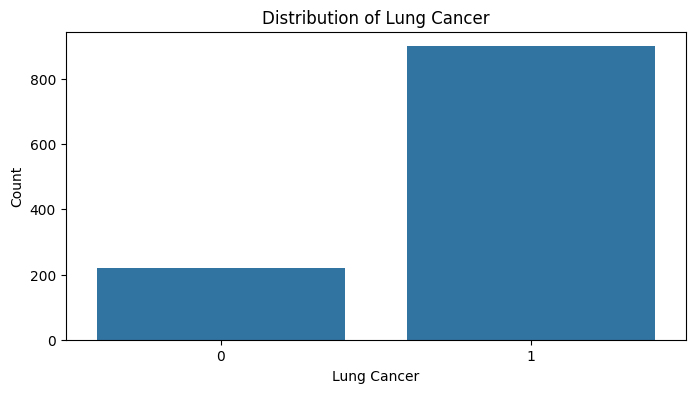

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='LUNG_CANCER', data=newdf)
plt.title('Distribution of Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()

Exploring the relationship of the independent variables with our target variable.

In [ ]:
def plot(col, newdf=newdf):
    return newdf.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(6,4))

<Axes: xlabel='CHEST_PAIN'>

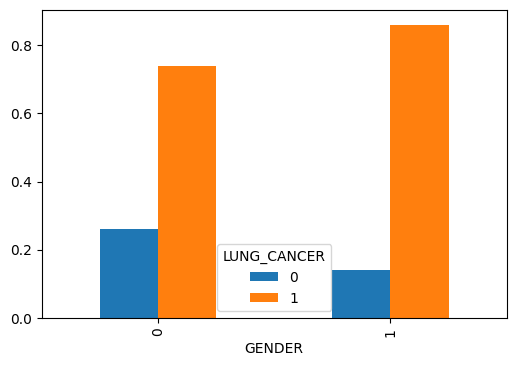

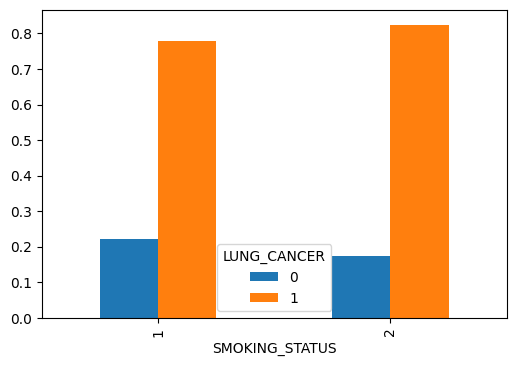

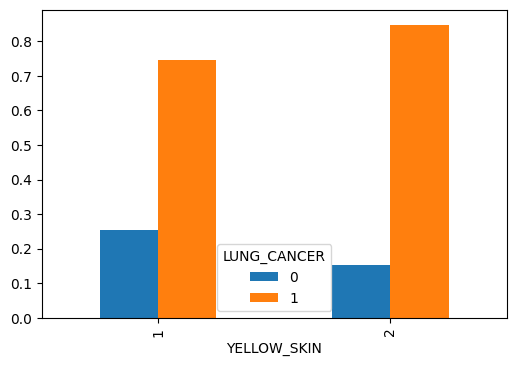

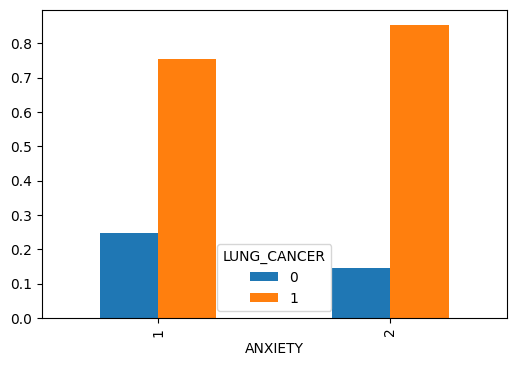

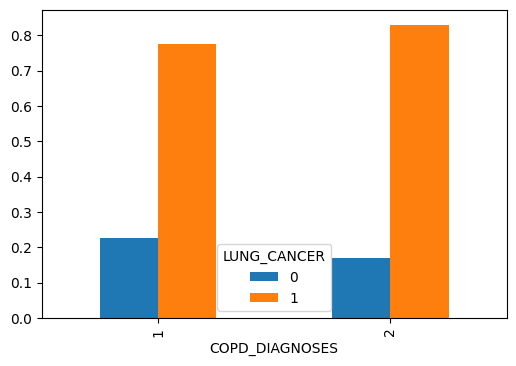

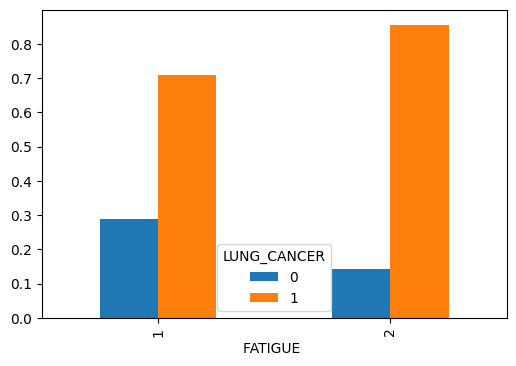

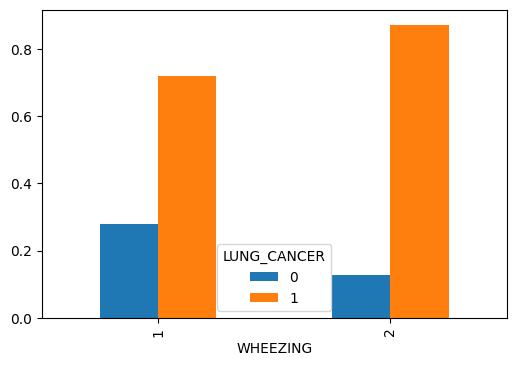

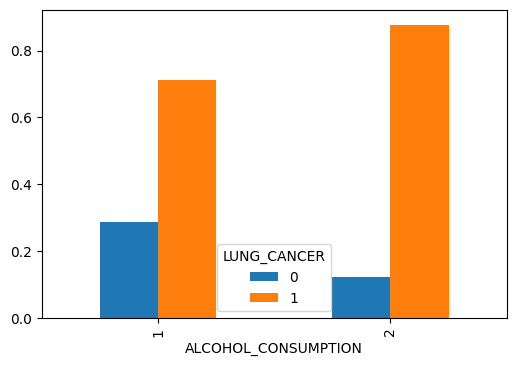

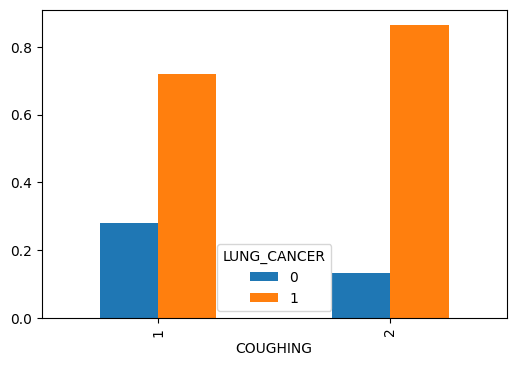

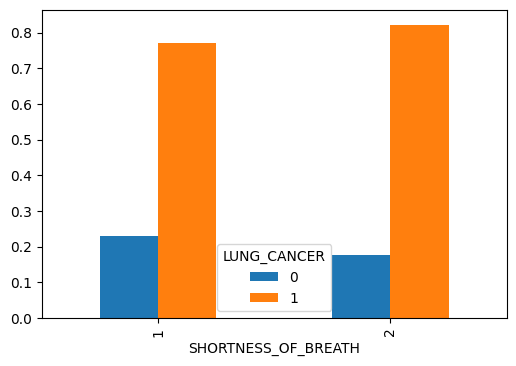

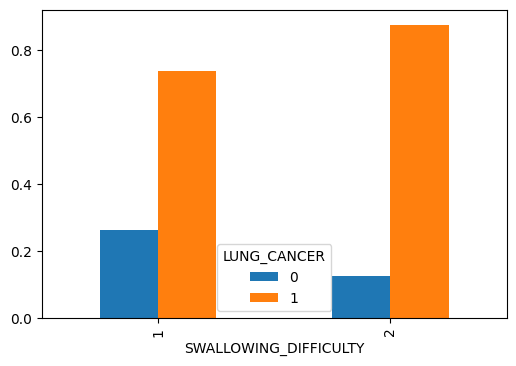

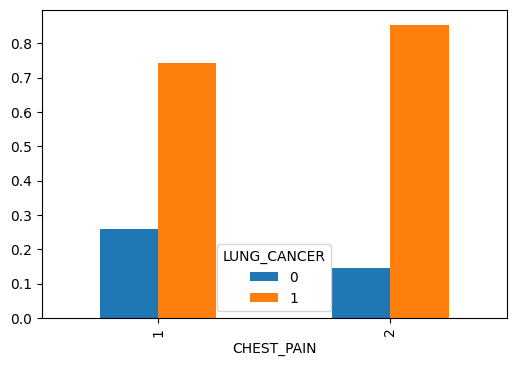

In [ ]:
plot('GENDER')
plot('SMOKING_STATUS')
plot('YELLOW_SKIN')
plot('ANXIETY')
plot('COPD_DIAGNOSES')
plot('FATIGUE ')
plot('WHEEZING')
plot('ALCOHOL_CONSUMPTION')
plot('COUGHING')
plot('SHORTNESS_OF_BREATH')
plot('SWALLOWING_DIFFICULTY')
plot('CHEST_PAIN')



In [ ]:
X=newdf.drop(['LUNG_CANCER'],axis=1)
y=newdf['LUNG_CANCER']

In [ ]:
X.columns

Index(['GENDER', 'AGE', 'SMOKING_STATUS', 'DAILY_CIGARETTES', 'YELLOW_SKIN',
       'ANXIETY', 'COPD_DIAGNOSES', 'FATIGUE ', 'WHEEZING',
       'ALCOHOL_CONSUMPTION', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'],
      dtype='object')

In [ ]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

Changing the non binary labels 2 and 1 to 1 (yes)and O(No)

In [ ]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING_STATUS,DAILY_CIGARETTES,YELLOW_SKIN,ANXIETY,COPD_DIAGNOSES,FATIGUE,WHEEZING,ALCOHOL_CONSUMPTION,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1,0.798319,0,-1.815173,1,1,0,1,1,1,1,1,1,1
1,1,1.230677,1,0.530399,0,0,1,1,0,0,0,1,1,1
2,0,-0.066398,0,-1.815173,0,0,0,1,1,0,1,1,0,1
3,1,0.279489,1,-0.197537,1,1,0,0,0,1,0,0,1,1
4,0,0.279489,0,-1.815173,1,0,0,0,1,0,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3, stratify= y )

In [ ]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)


(784, 14) (784,)
(336, 14) (336,)


**Naive Bayes model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb_test=nb.predict(X_test)
y_nb_train=nb.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix ,ConfusionMatrixDisplay
print(confusion_matrix(y_train,y_nb_train))
print(classification_report(y_train,y_nb_train))

[[ 69  85]
 [ 47 583]]
              precision    recall  f1-score   support

           0       0.59      0.45      0.51       154
           1       0.87      0.93      0.90       630

    accuracy                           0.83       784
   macro avg       0.73      0.69      0.70       784
weighted avg       0.82      0.83      0.82       784



In [ ]:

print(confusion_matrix(y_test, y_nb_test))
print(classification_report(y_test, y_nb_test))

[[ 27  39]
 [ 26 244]]
              precision    recall  f1-score   support

           0       0.51      0.41      0.45        66
           1       0.86      0.90      0.88       270

    accuracy                           0.81       336
   macro avg       0.69      0.66      0.67       336
weighted avg       0.79      0.81      0.80       336



To plot the AOC-ROC curve.

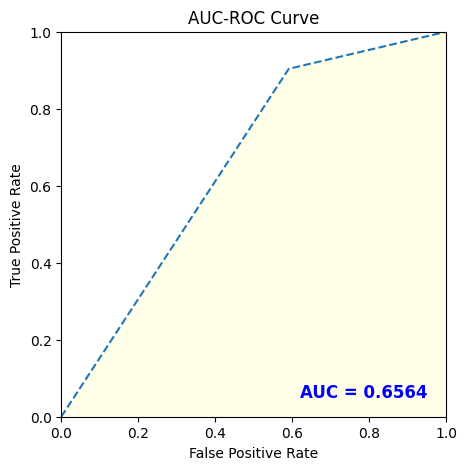

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_nb_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_nb_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC-ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

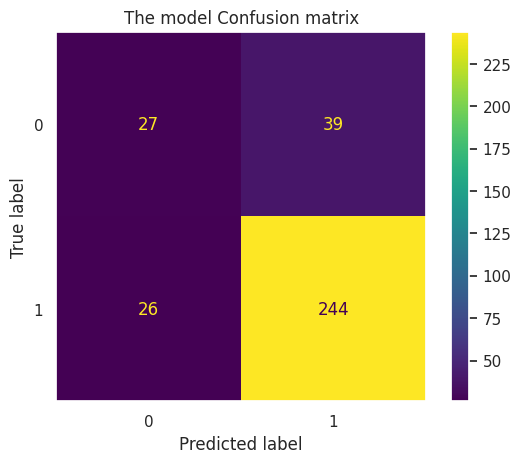

In [ ]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_nb_test)
plt.title('The model Confusion matrix')
plt.show()

Tuning nb model using var smoothing hyperparameter.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the model
nb = GaussianNB()

# Define the parameter grid
param_grid_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}

# Set up GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5, scoring='accuracy')

# Fit the model
grid_search_nb.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for NB: {grid_search_nb.best_params_}")
print(f"Best score for NB: {grid_search_nb.best_score_}")

Best parameters for NB: {'var_smoothing': 1e-09}
Best score for NB: 0.8290952147640045


**KNN classifier model**

Text(0, 0.5, 'Mean Error')

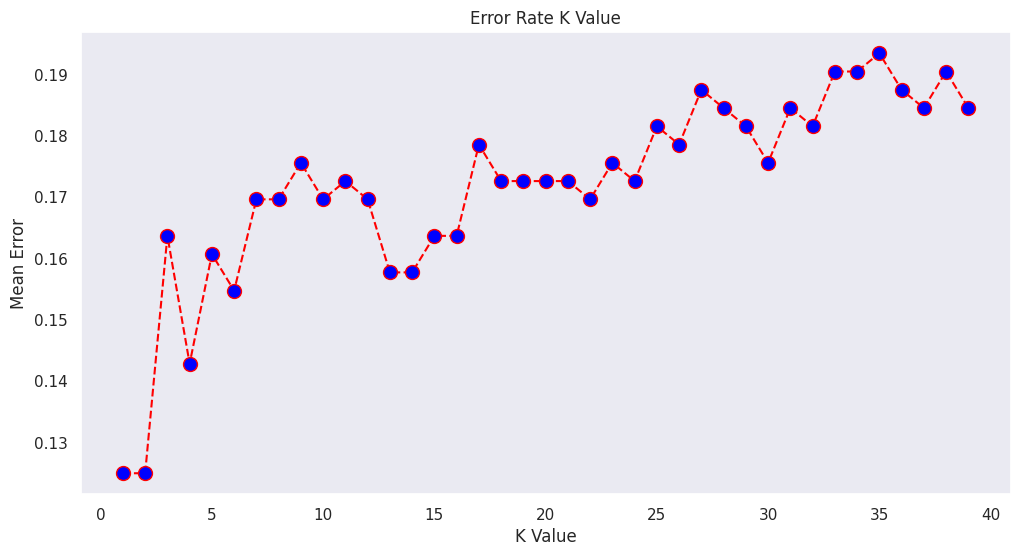

In [ ]:
# Calculating error for K values between 1 and 40
error = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


lowest error occurs on the first k values n-neighbor=1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
y_knn_test=knn.predict(X_test)
y_knn_train=knn.predict(X_train)

**The Model's metric score report on training dataset**

In [ ]:
print(confusion_matrix(y_train,y_knn_train))
print(classification_report(y_train,y_knn_train))

[[105  49]
 [ 14 616]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       154
           1       0.93      0.98      0.95       630

    accuracy                           0.92       784
   macro avg       0.90      0.83      0.86       784
weighted avg       0.92      0.92      0.92       784



**The Model's metric score report on test dataset**

In [ ]:
print(confusion_matrix(y_test, y_knn_test))
print(classification_report(y_test, y_knn_test))

[[ 30  36]
 [ 19 251]]
              precision    recall  f1-score   support

           0       0.61      0.45      0.52        66
           1       0.87      0.93      0.90       270

    accuracy                           0.84       336
   macro avg       0.74      0.69      0.71       336
weighted avg       0.82      0.84      0.83       336



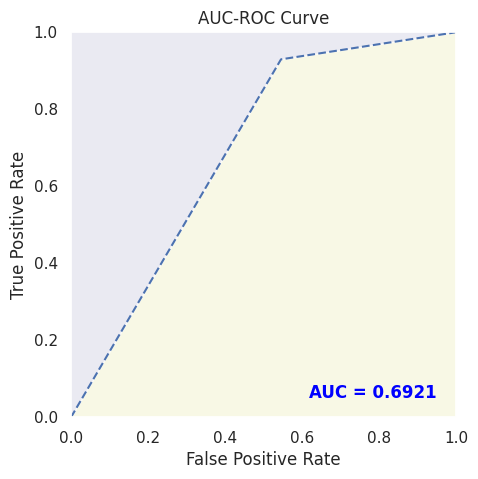

In [ ]:
auc = metrics.roc_auc_score(y_test, y_knn_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_knn_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC-ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

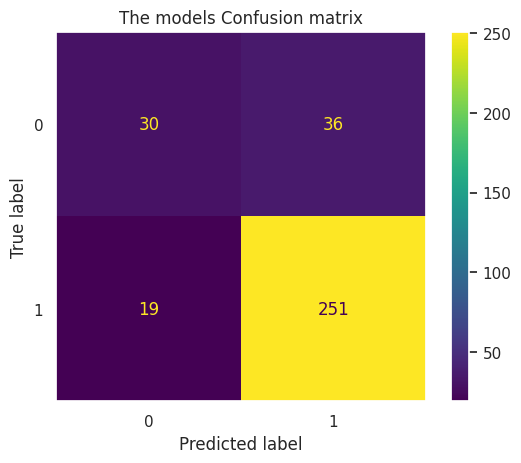

In [ ]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test)
plt.title('The models Confusion matrix')
plt.show()

**Tuning the model using gridsearchcv**

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn1 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn1, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

**Checking the best tuned hyperparameters.**

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_


{'metric': 'manhattan', 'n_neighbors': 1}

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()
# create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': [1], 'metric': ['manhattan']}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
y_knn2_test=knn_gscv.predict(X_test)
y_knn2_train=knn_gscv.predict(X_train)

In [ ]:
print(confusion_matrix(y_train, y_knn2_train))
print(classification_report(y_train, y_knn2_train))

[[154   0]
 [  1 629]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       154
           1       1.00      1.00      1.00       630

    accuracy                           1.00       784
   macro avg       1.00      1.00      1.00       784
weighted avg       1.00      1.00      1.00       784



In [ ]:
print(confusion_matrix(y_test, y_knn2_test))
print(classification_report(y_test, y_knn2_test))

[[ 66   0]
 [  0 270]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       270

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336



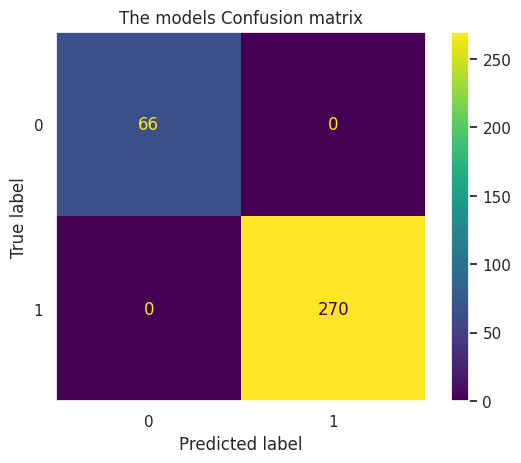

In [ ]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_knn2_test)
plt.title('The models Confusion matrix')
plt.show()

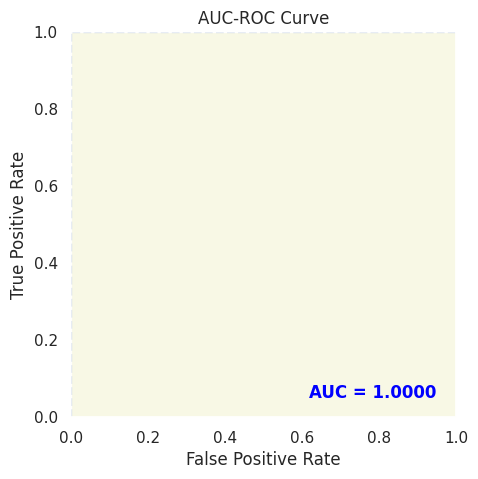

In [ ]:
auc = metrics.roc_auc_score(y_test, y_knn2_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_knn2_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC-ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

 **Support Vector Machine (SVM) with a Linear Kernel**

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_svm_test = svclassifier.predict(X_test)
y_svm_train = svclassifier.predict(X_train)

In [ ]:
print(confusion_matrix(y_train, y_svm_train))
print(classification_report(y_train, y_svm_train))

[[ 54 100]
 [ 26 604]]
              precision    recall  f1-score   support

           0       0.68      0.35      0.46       154
           1       0.86      0.96      0.91       630

    accuracy                           0.84       784
   macro avg       0.77      0.65      0.68       784
weighted avg       0.82      0.84      0.82       784



In [ ]:
print(confusion_matrix(y_test, y_svm_test))
print(classification_report(y_test, y_svm_test))

[[ 20  46]
 [ 17 253]]
              precision    recall  f1-score   support

           0       0.54      0.30      0.39        66
           1       0.85      0.94      0.89       270

    accuracy                           0.81       336
   macro avg       0.69      0.62      0.64       336
weighted avg       0.79      0.81      0.79       336



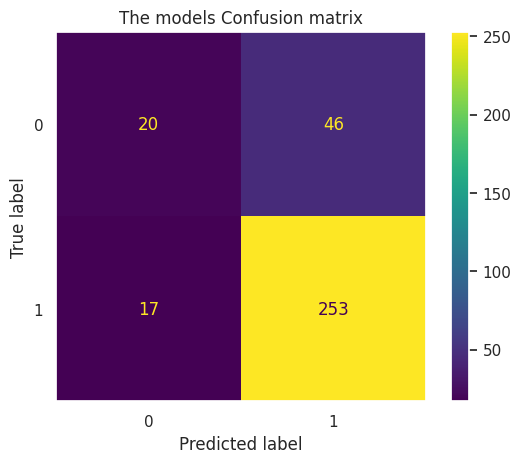

In [ ]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_svm_test)
plt.title('The models Confusion matrix')
plt.show()

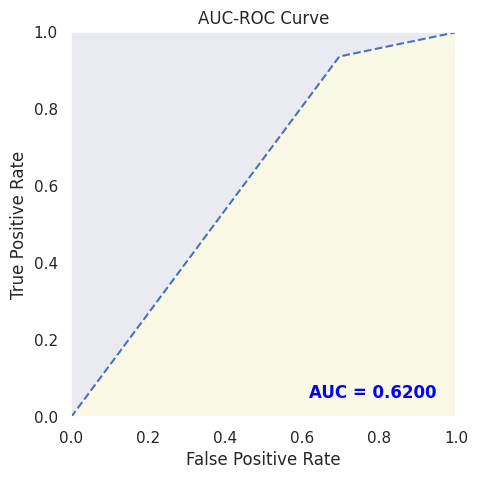

In [ ]:
auc = metrics.roc_auc_score(y_test, y_svm_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_svm_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC-ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Artifical neural network MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

y_ann_train = mlp.predict(X_train)
y_ann_test = mlp.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model's performance based on training dataset.

In [ ]:
print(confusion_matrix(y_train,y_ann_train))
print(classification_report(y_train,y_ann_train))

[[108  46]
 [ 20 610]]
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       154
           1       0.93      0.97      0.95       630

    accuracy                           0.92       784
   macro avg       0.89      0.83      0.86       784
weighted avg       0.91      0.92      0.91       784



Model's performance based on testing dataset.

In [ ]:
print(confusion_matrix(y_test,y_ann_test))
print(classification_report(y_test,y_ann_test))

[[ 37  29]
 [ 21 249]]
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        66
           1       0.90      0.92      0.91       270

    accuracy                           0.85       336
   macro avg       0.77      0.74      0.75       336
weighted avg       0.85      0.85      0.85       336



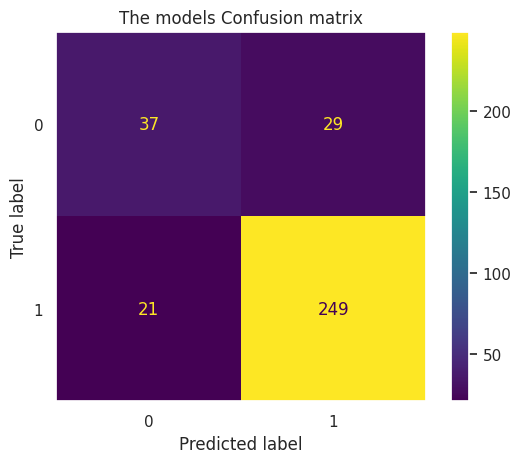

In [ ]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_ann_test)
plt.title('The models Confusion matrix')
plt.show()

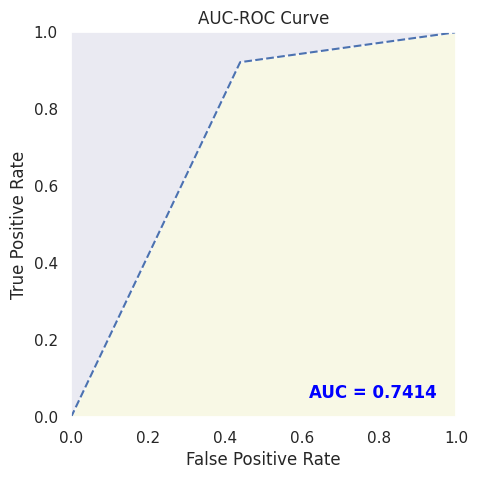

In [ ]:
auc = metrics.roc_auc_score(y_test, y_ann_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_ann_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC-ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**Tuning the model using gridsearchcv**

In [ ]:

params = {'activation': ['relu', 'tanh', 'identity'],
          'hidden_layer_sizes': [(13,), (25,50,),(30,60.90)],
          'solver': ['adam', 'sgd'],
          'learning_rate' : ['constant', 'adaptive'],
          'max_iter': [500]
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=42), param_grid=params, n_jobs=1, cv=5, verbose=3)
mlp_classif_grid.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.866 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.854 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.860 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.809 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.859 total time=   0.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.828 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.777 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.822 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.815 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.808 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.866 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.854 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.860 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.809 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.859 total time=   1.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.828 total time=   0.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.777 total time=   0.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.822 total time=   0.9s
[CV 4/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.815 total time=   0.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.808 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.904 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.834 total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.873 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.854 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.833 total time=   2.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.866 total time=   2.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.803 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.834 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.803 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.853 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.904 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.834 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.873 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.854 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.833 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.866 total time=   1.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.803 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.834 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.803 total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.853 total time=   2.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 60.9), learning_rate=constant, max_iter=500, solver=adam;, score=nan total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 60.9), learning_rate=constant, max_iter=500, solver=adam;, score=nan total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 60.9), learning_rate=constant, max_iter=500, solver=adam;, score=nan total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 60.9), learning_rate=constant, max_iter=500, solver=adam;, score=nan total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 60.9), learning_rate=constant, max_iter=500, solver=adam;, score=nan total time=   0.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 60.9), learning_rate=constant, max_iter=500, solver=sgd;, score=nan total time=   0.0s
[CV 2/5]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.828 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.834 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.860 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.834 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=adam;, score=0.853 total time=   0.9s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.828 total time=   0.8s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.777 total time=   0.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.822 total time=   0.8s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.834 total time=   0.7s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=constant, max_iter=500, solver=sgd;, score=0.814 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.828 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.834 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.860 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.834 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.853 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.828 total time=   0.8s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.777 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.822 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.834 total time=   0.8s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(13,), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.821 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.892 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.860 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.904 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.860 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=adam;, score=0.827 total time=   5.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.822 total time=   2.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.809 total time=   2.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.815 total time=   2.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.803 total time=   3.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=constant, max_iter=500, solver=sgd;, score=0.827 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.892 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.860 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.904 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.860 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=adam;, score=0.827 total time=   4.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.822 total time=   6.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.809 total time=   2.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.815 total time=   2.7s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.803 total time=   2.7s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(25, 50), learning_rate=adaptive, max_iter=500, solver=sgd;, score=0.827 total time=   4.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 60.9), learning_rate=constant, max_iter=500, solver=adam;, score=nan total time=   0.0s
[CV 2/5] EN

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 749, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 454, in _fit
    self._initialize(y, layer_units,

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=1,
             param_grid={'activation': ['relu', 'tanh', 'identity'],
                         'hidden_layer_sizes': [(13,), (25, 50), (30, 60.9)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [500], 'solver': ['adam', 'sgd']},
             verbose=3)

In [ ]:
mlp_classif_grid.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (25, 50),
 'learning_rate': 'constant',
 'max_iter': 500,
 'solver': 'adam'}

Fitting the training data to our model, based on the hyperparameter from gridsearch.

In [ ]:
mlp = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(25, 50),
    learning_rate='constant',
    max_iter=500,
    solver='adam'
)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_ann2_test = mlp.predict(X_test)
y_ann2_train = mlp.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(confusion_matrix(y_train,y_ann2_train))
print(classification_report(y_train,y_ann2_train))

[[136  18]
 [  9 621]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       154
           1       0.97      0.99      0.98       630

    accuracy                           0.97       784
   macro avg       0.95      0.93      0.94       784
weighted avg       0.97      0.97      0.97       784



In [ ]:
print(confusion_matrix(y_test,y_ann2_test))
print(classification_report(y_test,y_ann2_test))

[[ 45  21]
 [ 24 246]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        66
           1       0.92      0.91      0.92       270

    accuracy                           0.87       336
   macro avg       0.79      0.80      0.79       336
weighted avg       0.87      0.87      0.87       336



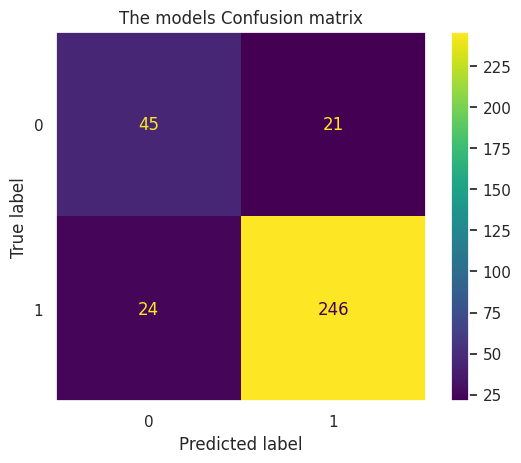

In [ ]:
sns.set(rc = {'axes.grid':False})
ConfusionMatrixDisplay.from_predictions(y_test, y_ann2_test)
plt.title('The models Confusion matrix')
plt.show()

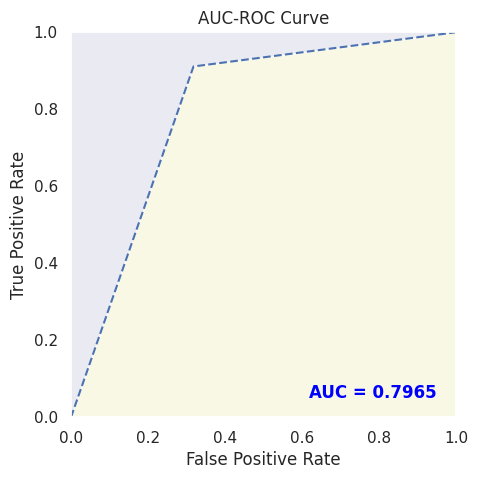

In [ ]:
auc = metrics.roc_auc_score(y_test, y_ann2_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_ann2_test)

plt.figure(figsize=(5, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC-ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightyellow', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()